### Plots for windows - annotation per subject

In [67]:
import mne
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from tqdm import tqdm
import pprint

pp = pprint.PrettyPrinter(indent=2)


In [77]:
# load mats (for scopolamine dataset)
def load_mats(path, info, classification, dataset, descriptions):
    raws, desc = [], []

    mats = os.listdir(path)
    for i, mat in enumerate(mats):
        print(mat)
        # select columns 3 and 4 (Fpz-Cz, and Pz-Oz respectively) and convert to microvolts
        # x = loadmat(path + mat)['RawSignal'][:, [2,3]].T / 1000000
        raw = mne.io.read_raw_fif(path+mat)
            
        # subject
        subject = int(mat.split('.')[1][2:])
        # recording (occasion)
        recording = int(mat.split('.')[-2].split('M')[0][1:])
        # treatment period
        treatment_period = int(mat.split('.')[-2].split('M')[-1])

        # if even (not placebo)
        # if not recording&1:
        raws += [raw]
        desc += [{'subject': subject, 'recording': recording, 'treatment_period': treatment_period, 'raw': path+mat}]
            

    dataset += raws
    descriptions += desc

    return dataset, descriptions

# load scopolamine data
def load_scopolamine_data(sfreq, low_cut_hz, high_cut_hz, n_jobs, window_size_samples):
    print(':: loading SCOPOLAMINE data')

    # 11 measurements times from 0.5 hrs to 8.5 hrs after Scopolamine (or placebo) administration
    # m01 = 'data/scopolamine/M01/'
    m01 = '/media/maligan/My Passport/msc_thesis/data/scopolamine_preprocessed_1e5/M01/'
    # m05 = 'data/scopolamine_preprocessed_1e5/M05/'
    m05 = '/media/maligan/My Passport/msc_thesis/data/scopolamine_preprocessed_1e5/M05/'
    # m11 = 'data/scopolamine_preprocessed_1e5/M11/'
    m11 = '/media/maligan/My Passport/msc_thesis/data/scopolamine_preprocessed_1e5/M11/'

    dataset, descriptions = [], []
    info = mne.create_info(ch_names=['Fpz-cz', 'Pz-Oz'], ch_types=['eeg']*2, sfreq=1012)

    dataset, descriptions = load_mats(m01, info, 'm01', dataset, descriptions)
    dataset, descriptions = load_mats(m05, info, 'm05', dataset, descriptions)
    dataset, descriptions = load_mats(m11, info, 'm11', dataset, descriptions)

    return dataset, descriptions

In [ ]:
dataset, descriptions = load_scopolamine_data(sfreq=100, low_cut_hz=0.5, high_cut_hz=30, n_jobs=1, window_size_samples=500)

In [79]:
df = pd.DataFrame(descriptions).groupby(['subject','treatment_period']).min().head(15)
df

recording  \
subject treatment_period              
1       1                         1   
        5                         1   
        11                        1   
2       1                         1   
        5                         1   
        11                        1   
3       1                         2   
        5                         1   
        11                        1   
4       1                         1   
        5                         1   
        11                        1   
5       1                         1   
        5                         1   
        11                        1   

                                                                        raw  
subject treatment_period                                                     
1       1                 /media/maligan/My Passport/msc_thesis/data/sco...  
        5                 /media/maligan/My Passport/msc_thesis/data/sco...  
        11                /media/maligan/My Passport/msc_thesis/data/sco...  
2       1                 /media/maligan/My Passport/msc_thesis/data/sco...  
        5                 /media/maligan/My Passport/msc_thesis/data/sco...  
        11                /media/maligan/My Passport/msc_thesis/data/sco...  
3       1                 /media/maligan/My Passport/msc_thesis/data/sco...  
        5                 /media/maligan/My Passport/msc_thesis/data/sco...  
        11                /media/maligan/My Passport/msc_thesis/data/sco...  
4       1                 /media/maligan/My Passport/msc_thesis/data/sco...  
        5                 /media/maligan/My Passport/msc_thesis/data/sco...  
        11                /media/maligan/My Passport/msc_thesis/data/sco...  
5       1                 /media/maligan/My Passport/msc_thesis/data/sco...  
        5                 /media/maligan/My Passport/msc_thesis/data/sco...  
        11                /media/maligan/My Passport/msc_thesis/data/sco...

In [ ]:
raws = [mne.io.read_raw_fif(df.iloc[i,1]) for i in range(len(df))]

In [72]:
cols = 3
rows = int(len(df)/cols)
# fig = plt.figure()

plt.rc('font', size=12) 

_, axes = plt.subplots(rows, 3, figsize=(60, 15))

# fig, axes = plt.subplots(len(df))

for i, ax in enumerate(axes.ravel()):
    raws[i].plot(show=False, duration=5, start=15, show_scrollbars=False)
    ax.set_title('Scopolamine Sample EEG Traces')

    file_name = f'./tf_plots/trace_{i}.png'

    plt.savefig(file_name)
    plt.close()


In [7]:
fig, axes = plt.subplots(rows, cols, figsize=(60, 60))

i = 0 
for x in range(rows):
    for y in range(cols):
        file_name = f'./tf_plots/trace_{i}.png'
        img = cv2.imread(file_name)

        plt.imshow(img)
        plt.tight_layout()
        axes[x,y].imshow(img)
        axes[x,y].set_axis_off()

        i += 1

plt.savefig('./tf_plots/traces.jpg')
plt.close()

### TF plots

In [ ]:
# single channel (Fpz-Cz)

plt.close()

plt.rc('font', size=12)
plt.rc('')

# get data (5s - start 15s)
signal = raw.get_data()[0][15000:20000]

# Plot the signal read from wav file
fig, axes = plt.subplots(1, 1, figsize=(6,4))
plt.title('TF plots')
plt.tight_layout()

axes.set_title('Fpz-Cz')
axes.specgram(signal, Fs=raw.info['sfreq'])
axes.set(xlabel='time (s)', ylabel='frequency')

plt.show()

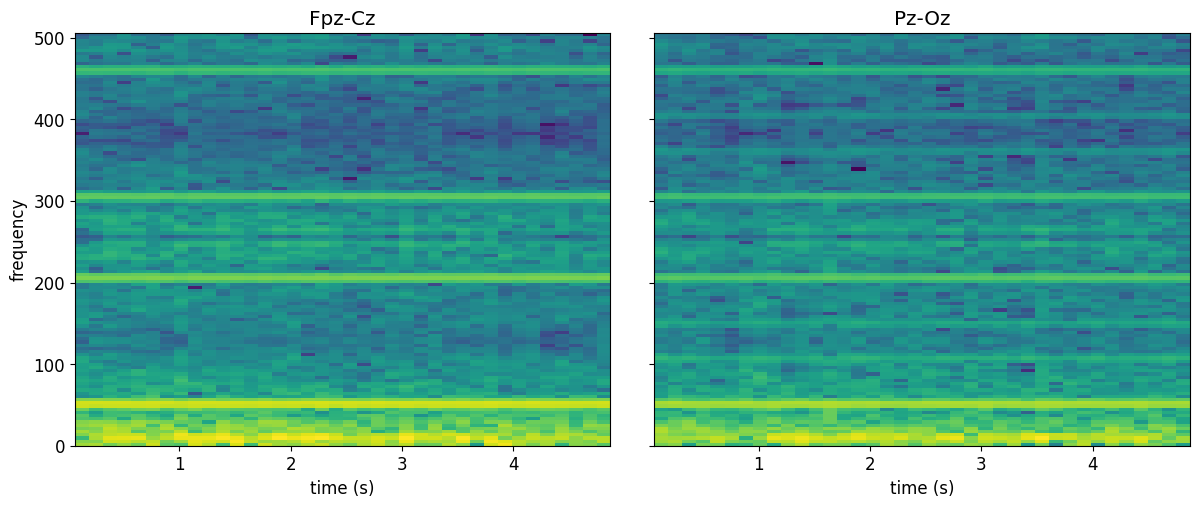

In [172]:
# horizontal

plt.close()

plt.rc('font', size=12)
plt.rc('')

# get data (5s - start 15s)
signal_c1 = raw.get_data()[0][15000:20000]
signal_c2 = raw.get_data()[1][15000:20000]

# Plot the signal read from wav file
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)
plt.title('TF plots')
plt.tight_layout()

# axes[0].plot(signal)
# axes[0].set(xlabel='sample', ylabel='amplitude')
axes[0].set_title('Fpz-Cz')
axes[0].specgram(signal_c1, Fs=raw.info['sfreq'])
axes[0].set(xlabel='time (s)', ylabel='frequency')

axes[1].set_title('Pz-Oz')
axes[1].specgram(signal_c2, Fs=raw.info['sfreq'])
axes[1].set(xlabel='time (s)')

plt.show()

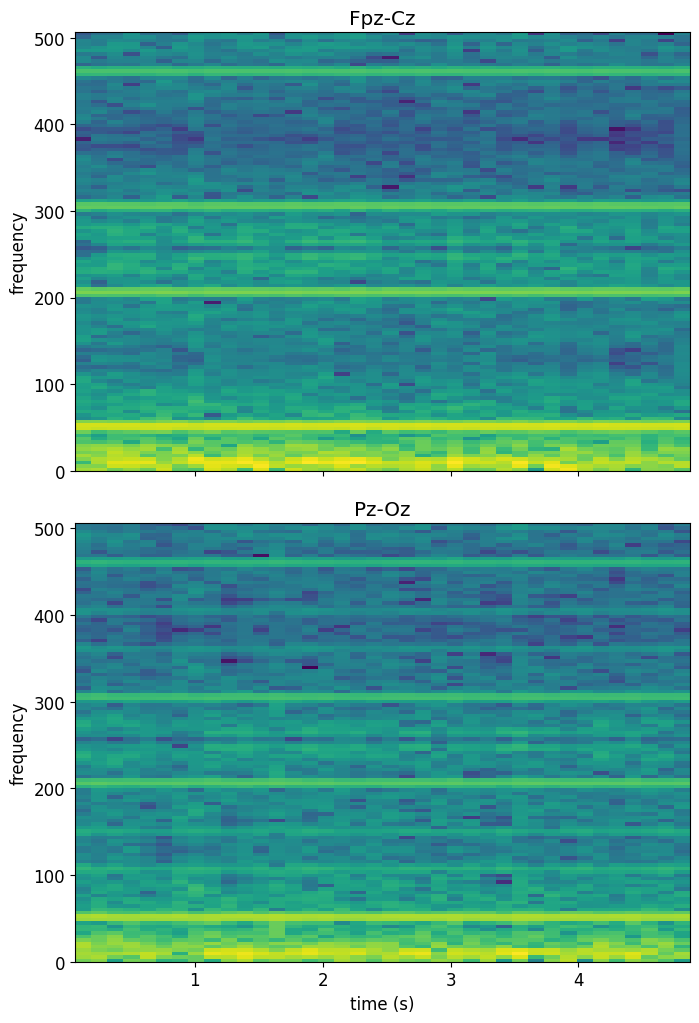

In [173]:
#vertical

plt.close()

plt.rc('font', size=12)
plt.rc('')

# get data (5s - start 15s)
signal_c1 = raw.get_data()[0][15000:20000]
signal_c2 = raw.get_data()[1][15000:20000]

# Plot the signal read from wav file
fig, axes = plt.subplots(2, 1, figsize=(7,10), sharex=True)
plt.title('TF plots')
plt.tight_layout()

# axes[0].plot(signal)
# axes[0].set(xlabel='sample', ylabel='amplitude')
axes[0].set_title('Fpz-Cz')
axes[0].specgram(signal_c1, Fs=raw.info['sfreq'])
axes[0].set(ylabel='frequency')

axes[1].set_title('Pz-Oz')
axes[1].specgram(signal_c2, Fs=raw.info['sfreq'])
axes[1].set(xlabel='time (s)', ylabel='frequency')

plt.show()

In [90]:
#  EEG TF plots / traces

dir_path = 'tf_plots_preprocessed_scop'
# plotting = 'trace'
plotting = 'tf'

cols = 3
rows = int(len(df)/cols)

plt.rc('font', size=12) 
params = {
    # 'axes.labelsize': 'small',
    # 'axes.titlesize': 16,
    # 'xtick.labelsize': 'large',
    # 'ytick.labelsize': 'large',
    'axes.labelsize': 20.0,
}
plt.rcParams.update(params)

_, axes = plt.subplots(rows, 3, figsize=(60, 21))


labels = np.unique([raw.annotations[0]['description'] for raw in raws])
count = 0

for i, ax in enumerate(axes.ravel()):
    # get data (5s - start 15s)
    signal_c1 = raws[i].get_data()[0][15000:20000]
    signal_c2 = raws[i].get_data()[1][15000:20000]

    # Plot the signal read from wav file
    # fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)
    # fig, axes = plt.subplots(2, 1, figsize=(7,10), sharex=True)
    fig, axes = plt.subplots(1, 1, figsize=(6,4))
    plt.tight_layout()

    # axes[0].set_title('Fpz-Cz')
    # axes[0].specgram(signal_c1, Fs=raws[i].info['sfreq'])
    # axes[0].set(xlabel='time (s)', ylabel='frequency')

    # axes[1].set_title('Pz-Oz')
    # axes[1].specgram(signal_c2, Fs=raws[i].info['sfreq'])
    # axes[1].set(xlabel='time (s)')


    # axes[0].set_title('Fpz-Cz')
    # axes[0].specgram(signal_c1, Fs=raw.info['sfreq'])
    # axes[0].set(ylabel='frequency')

    # axes[1].set_title('Pz-Oz')
    # axes[1].specgram(signal_c2, Fs=raw.info['sfreq'])
    # axes[1].set(xlabel='time (s)', ylabel='frequency')

    # axes.set_title('Fpz-Cz')
    if plotting == 'trace':
        raws[i].plot(show=False, duration=5, start=15, show_scrollbars=False)
    else:
        plt.specgram(signal_c1, Fs=raws[i].info['sfreq'], scale_by_freq=False)

    # axes.set(xlabel='time (s)')


    # plt.set_title('Scopolamine Sample Time-Frequency Plots')

    file_name = f'./{dir_path}/{plotting}_{i}.png'

    # axes
    if i < 3:
        axes.set_title(labels[i])
    # x-labels
    elif rows*cols - i <= cols:
        axes.set(xlabel=f'time (s)')
    else:
        axes.set(xlabel=f' ')
    # y-labels
    if i%cols == 0:
        count += 1
        axes.set(ylabel=f'subject #{count}')


    plt.savefig(file_name, bbox_inches="tight")
    plt.close()


<ipython-input-90-e74d172fec95>:58: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=0).
  plt.specgram(signal_c1, Fs=raws[i].info['sfreq'], scale_by_freq=False)
/home/maligan/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7580: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


In [91]:

fig, axes = plt.subplots(rows, cols, figsize=(60, 60))

plt.rc('font', size=26)

i = 0 
for x in range(rows):
    for y in range(cols):
        file_name = f'./{dir_path}/{plotting}_{i}.png'
        img = cv2.imread(file_name)
        # convert from read BGR to RGB
        if plotting == 'tf':
            img = np.flip(img, axis=-1)
        
        axes[x,y].imshow(img)
        axes[x,y].set_axis_off()
        i += 1

# fig.subplots_adjust(top=0.5)
# plt.text(x=0.5, y=0.94, s="My title 1", fontsize=25, ha="center")
fig.tight_layout()

fig.savefig(f'./{dir_path}/{plotting}s.jpg', bbox_inches="tight")
plt.close()

In [50]:
# fig, axes = plt.subplots(rows, cols, figsize=(60, 60))

# plt.rc('font', size=26)

# i = 0 
# for x in range(rows):
#     for y in range(cols):
#         file_name = f'./tf_plots/{plotting}_{i}.png'
#         img = cv2.imread(file_name)
#         # convert from read BGR to RGB
#         if plotting == 'tf':
#             img = np.flip(img, axis=-1)
        
#         axes[x,y].imshow(img)
#         axes[x,y].set_axis_off()
#         i += 1

# fig.subplots_adjust(top=0.5)
# # plt.text(x=0.5, y=0.94, s="My title 1", fontsize=25, ha="center")
# fig.tight_layout()

# fig.savefig('./tf_plots/{plotting}s.jpg', bbox_inches="tight")
# plt.close()

In [153]:
# from skimage import util

# M = 500
# signal = raw.get_data()[1]

# sfreq = 1012
# N = signal.shape[0]
# L = N / sfreq

# slices = util.view_as_windows(signal, window_shape=(M,), step=1500)
# print(f'Audio shape: {signal.shape}, Sliced audio shape: {slices.shape}')

# win = np.hanning(M + 1)[:-1]
# slices = slices * win
# slices = slices.T
# print('Shape of `slices`:', slices.shape)

# spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
# spectrum = np.abs(spectrum)

# S = np.abs(spectrum)
# S = 20 * np.log10(S / np.max(S))

# f, ax = plt.subplots(figsize=(20,10))
# ax.imshow(S, origin='lower', cmap='viridis',
#           extent=(0, L, 0, sfreq / 2 / 1000))
# ax.axis('tight')
# ax.set_ylabel('Frequency [kHz]')
# ax.set_xlabel('Time [s]')
# plt.show()